In [162]:
import pandas as pd
import yfinance as yf
from datetime import date , timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [163]:
start_date = '2023-12-1'
end_date = '2024-12-1'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2023-12-1  End Date: 2024-12-1


In [164]:
ticker = 'TSLA'

df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300
...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-12-01 to 2024-11-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  251 non-null    float64
 1   (Close, TSLA)      251 non-null    float64
 2   (High, TSLA)       251 non-null    float64
 3   (Low, TSLA)        251 non-null    float64
 4   (Open, TSLA)       251 non-null    float64
 5   (Volume, TSLA)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [166]:
df.insert(0,'Date',0,)

In [167]:
df.isnull().sum()

Price      Ticker
Date                 0
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64

In [168]:
df.duplicated().sum()

0

<Axes: xlabel='Date'>

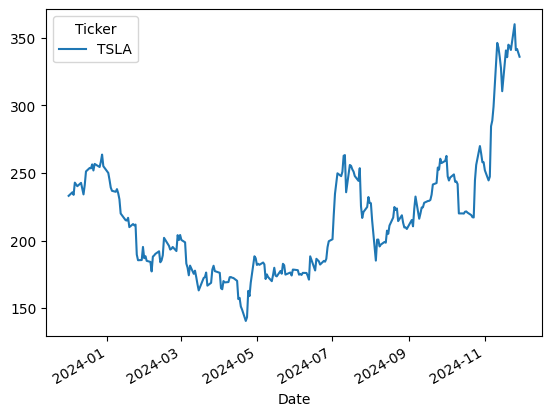

In [169]:
df['Open'].plot()

<Axes: xlabel='Date'>

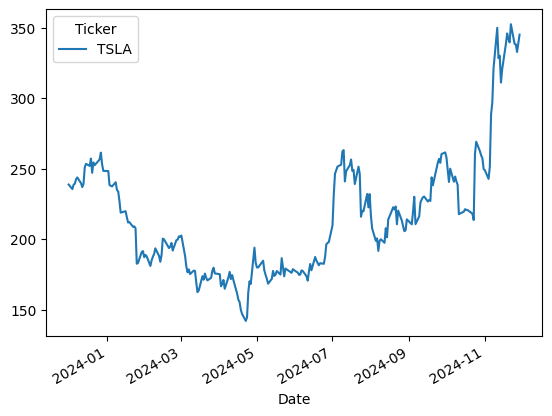

In [170]:
df['Close'].plot()

In [171]:
df['Close Rolling 10'] = df['Close'].rolling(window=10,min_periods=1).mean()
df.head(14)

Price,Date,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,,
2023-12-01,0,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002
2023-12-04,0,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002
2023-12-05,0,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002
2023-12-06,0,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000
2023-12-07,0,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000
2023-12-08,0,243.839996,243.839996,245.270004,239.270004,240.270004,102980100,239.829999
2023-12-11,0,239.740005,239.740005,243.440002,237.449997,242.740005,97913900,239.817143
2023-12-12,0,237.009995,237.009995,238.990005,233.869995,238.550003,95328300,239.466249


<Axes: xlabel='Date'>

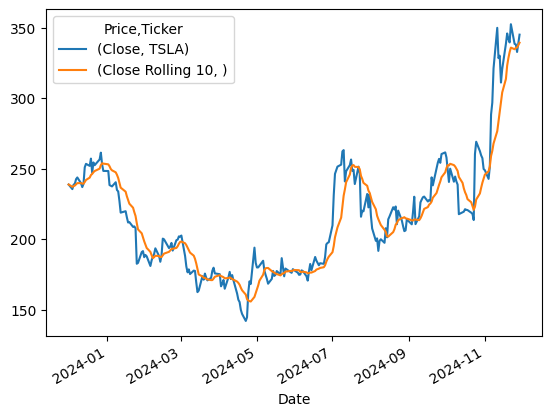

In [172]:
df[['Close','Close Rolling 10']].plot()

In [173]:
df['Close Rolling 30'] = df['Close'].rolling(window=30,min_periods=1).mean()

In [174]:
df['Close Rolling 50'] = df['Close'].rolling(window=50,min_periods=1).mean()
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,,
2023-12-01,0,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002
2023-12-04,0,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002
2023-12-05,0,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002
2023-12-06,0,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000
2023-12-07,0,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000
...,...,...,...,...,...,...,...,...,...,...
2024-11-22,0,352.559998,352.559998,361.529999,337.700012,341.089996,89140700,335.959998,277.358000,264.061800
2024-11-25,0,338.589996,338.589996,361.929993,338.200012,360.140015,95890900,334.818997,281.338999,266.298000


<Axes: xlabel='Date'>

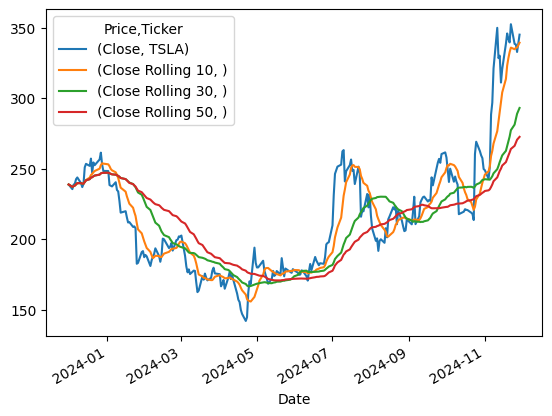

In [175]:
df[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()

In [176]:
#cummulative MOving average
df['CMA']=df['Close'].expanding().mean()
df

Price,Date,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
Date,,,,,,,,,,,
2023-12-01,0,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002,238.830002
2023-12-04,0,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002,237.205002
2023-12-05,0,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002,237.710002
2023-12-06,0,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000,238.125000
2023-12-07,0,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000,239.028000
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,0,352.559998,352.559998,361.529999,337.700012,341.089996,89140700,335.959998,277.358000,264.061800,214.444008
2024-11-25,0,338.589996,338.589996,361.929993,338.200012,360.140015,95890900,334.818997,281.338999,266.298000,214.944597


<Axes: xlabel='Date'>

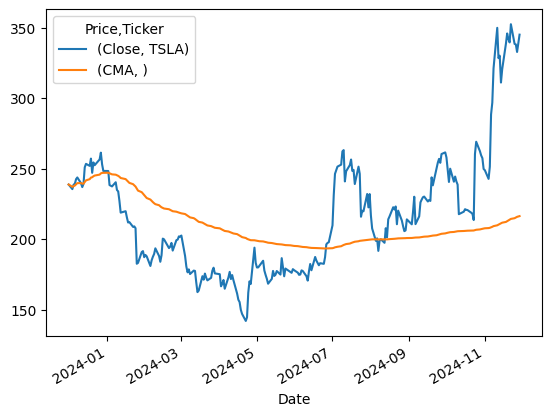

In [177]:
df[['Close','CMA']].plot()

In [178]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [179]:
adf_test(df['Close'])

ADF Statistics: -0.21546653898451537
p- value: 0.9366527608531471
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [180]:
df['First Difference'] = df['Close']-df['Close'].shift(1)
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,
Date,,,,,,,,,,,,
2023-12-01,0,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002,238.830002,NaN
2023-12-04,0,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002,237.205002,-3.250000
2023-12-05,0,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002,237.710002,3.139999
2023-12-06,0,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000,238.125000,0.649994
2023-12-07,0,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000,239.028000,3.270004


In [181]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -15.615983299237971
p- value: 1.7558357345756553e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

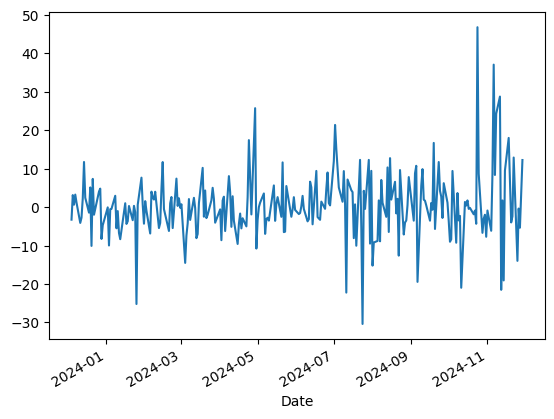

In [182]:
df['First Difference'].dropna().plot()

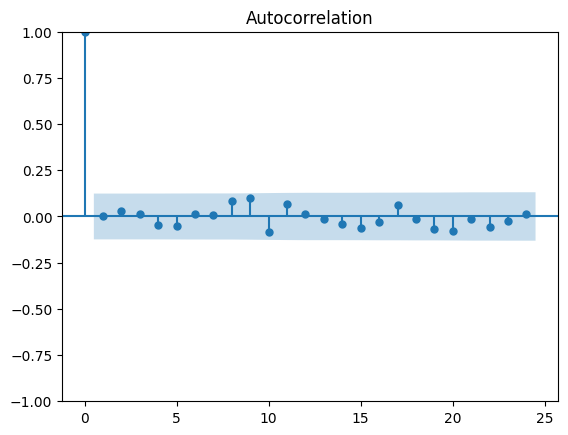

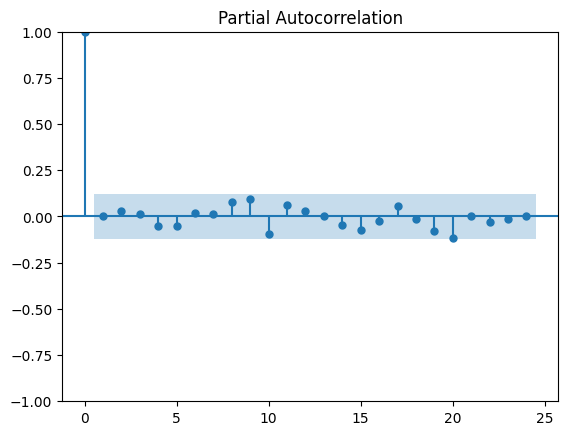

In [183]:
acf = plot_acf(df["First Difference"].dropna())
pacf = plot_pacf(df["First Difference"].dropna())

In [190]:
step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)
step.summary()

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Prog

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1791.632, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1793.629, Time=0.06 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1793.630, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1790.237, Time=0.01 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1795.601, Time=0.57 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.920 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:                        SARIMAX   Log Likelihood                -894.118
Date:                Mon, 16 Dec 2024   AIC                           1790.237
Time:                        11:48:52   BIC                           1793.758
Sample:                             0   HQIC                          1791.654
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        74.8189      3.503     21.358      0.000      67.953      81.685
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               305.60
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.86   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ARIMA=ARIMA(df['Close'],order=(20,1,1))
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [204]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   TSLA   No. Observations:                  251
Model:                ARIMA(20, 1, 5)   Log Likelihood                -884.449
Date:                Mon, 16 Dec 2024   AIC                           1820.899
Time:                        11:51:23   BIC                           1912.457
Sample:                             0   HQIC                          1857.748
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3040      0.491     -0.620      0.535      -1.265       0.657
ar.L2          0.3982      0.417      0.955      0.340      -0.419       1.215
ar.L3          0.2099      0.625      0.336      0.737      -1.016       1.435
ar.L4         -0.2479      0.473     -0.524      0.600      -1.176       0.680
ar.L5          0.0119      0.569      0.021      0.983      -1.104       1.128
ar.L6          0.0043      0.092      0.047      0.963      -0.176       0.185
ar.L7          0.0726      0.115      0.630      0.528      -0.153       0.298
ar.L8          0.1021      0.118      0.867      0.386      -0.129       0.333
ar.L9          0.0928      0.080      1.165      0.244      -0.063       0.249
ar.L10        -0.1126      0.091     -1.240      0.215      -0.291       0.065
ar.L11         0.0065      0.110      0.059      0.953      -0.210       0.223
ar.L12         0.1114      0.102      1.093      0.274      -0.088       0.311
ar.L13         0.0285      0.128      0.223      0.824      -0.222       0.279
ar.L14        -0.1078      0.107     -1.011      0.312      -0.317       0.101
ar.L15        -0.1022      0.114     -0.898      0.369      -0.325       0.121
ar.L16        -0.0230      0.106     -0.217      0.829      -0.232       0.186
ar.L17         0.1071      0.125      0.856      0.392      -0.138       0.352
ar.L18         0.0184      0.130      0.141      0.888      -0.237       0.273
ar.L19        -0.1310      0.126     -1.041      0.298      -0.378       0.116
ar.L20        -0.1771      0.119     -1.485      0.138      -0.411       0.057
ma.L1          0.2937      0.493      0.595      0.552      -0.673       1.260
ma.L2         -0.3643      0.439     -0.829      0.407      -1.225       0.497
ma.L3         -0.1696      0.626     -0.271      0.786      -1.396       1.057
ma.L4          0.1950      0.486      0.402      0.688      -0.757       1.147
ma.L5         -0.1196      0.569     -0.210      0.833      -1.234       0.995
sigma2        69.0343      5.267     13.107      0.000      58.712      79.357
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               340.04
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.19   Skew:                             0.91
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


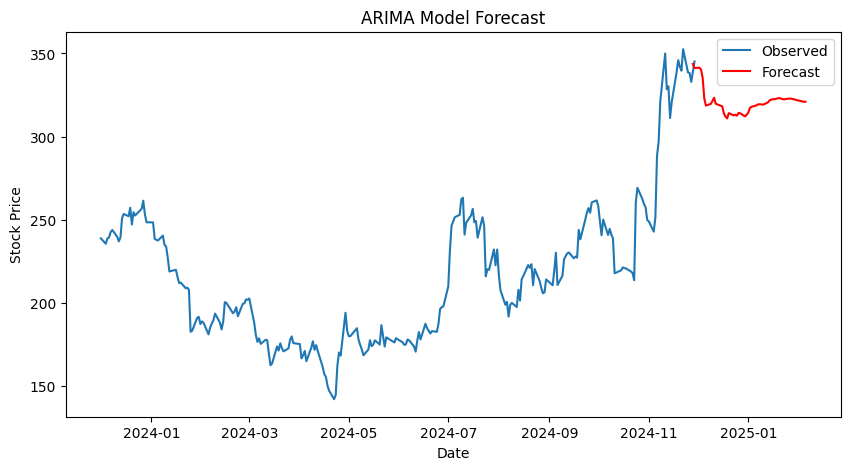

In [205]:
forecast_steps = 50
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

# Create a forecasted index (next 30 days)
forecast_index = pd.date_range(start=df.index[-2] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')

plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()